In [1]:
import os
import tensorflow as tf
from gan.CGAN import CGanNet
import tensorflow_datasets as tfds
import numpy as np
from keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot
import random

In [2]:
BATCH_SIZE = 32
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Load and prepare dataset

(trainX, labels), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = trainX.astype('float32') / 255.0

In [5]:
labels_strings = {f"{_}": _ for _ in [0, 1, 2 ,3 ,4 ,5 ,6 ,7 ,8, 9]}

cgan = CGanNet(batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=1,
          latent_dimension=100,
          training_data=x_train,
          labels_data=labels,
          number_of_classes=10,
          labels_names=labels_strings
)

print(labels_strings)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [6]:
cgan.clear_files_structure()

In [7]:
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()
cgan.create_files_structure()

Dataset size: 60000
Batches per epoch: 40
Half batch size is: 16
----> Epoch: 0
40/40 [==============================] - 6s 70ms/step

D_real_loss: 0.22363218665122986 D_fake_loss: 0.893187940120697 G_loss: 0.5465133190155029
D_real_acc: 1.0 D_fake_acc: 0.0
----> Epoch: 1
40/40 [==============================] - 3s 70ms/step

D_real_loss: 0.5498533248901367 D_fake_loss: 0.6671320796012878 G_loss: 0.7412852644920349
D_real_acc: 0.8125 D_fake_acc: 0.625
----> Epoch: 2
40/40 [==============================] - 3s 70ms/step

D_real_loss: 0.36639082431793213 D_fake_loss: 0.6542155742645264 G_loss: 0.801244854927063
D_real_acc: 1.0 D_fake_acc: 0.6875
----> Epoch: 3
40/40 [==============================] - 3s 70ms/step

D_real_loss: 0.494137704372406 D_fake_loss: 0.6129149198532104 G_loss: 0.9249099493026733
D_real_acc: 0.9375 D_fake_acc: 0.8125
----> Epoch: 4
40/40 [==============================] - 3s 69ms/step

D_real_loss: 0.5664186477661133 D_fake_loss: 0.5455160140991211 G_loss: 0.964662

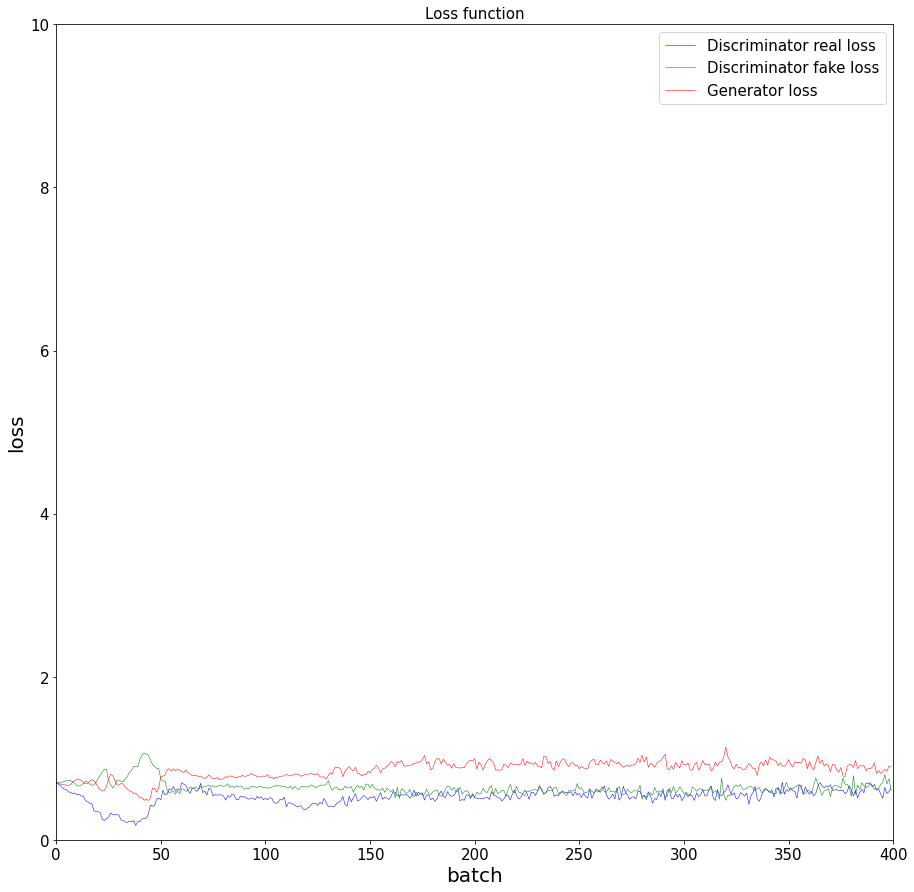

In [8]:
cgan.train(number_of_epochs=10, load_past_model=False)
cgan.plot_loss()

Dataset size: 60000
Batches per epoch: 40
Half batch size is: 16
----> Load epoch number: 209 from file .epoch
----> Epoch: 210
40/40 [==============================] - 3s 76ms/step

D_real_loss: 0.24222026765346527 D_fake_loss: 0.28729814291000366 G_loss: 2.7229366302490234
D_real_acc: 0.875 D_fake_acc: 0.9375
----> Epoch: 211
40/40 [==============================] - 3s 70ms/step

D_real_loss: 0.23340876400470734 D_fake_loss: 0.11008909344673157 G_loss: 3.2477059364318848
D_real_acc: 0.9375 D_fake_acc: 1.0
----> Epoch: 212
40/40 [==============================] - 3s 69ms/step

D_real_loss: 0.18945418298244476 D_fake_loss: 0.14275433123111725 G_loss: 3.2019596099853516
D_real_acc: 1.0 D_fake_acc: 1.0
----> Epoch: 213
40/40 [==============================] - 3s 68ms/step

D_real_loss: 0.2655169665813446 D_fake_loss: 0.3874943256378174 G_loss: 2.5504720211029053
D_real_acc: 0.875 D_fake_acc: 0.875
----> Epoch: 214
40/40 [==============================] - 3s 69ms/step

D_real_loss: 0.2410

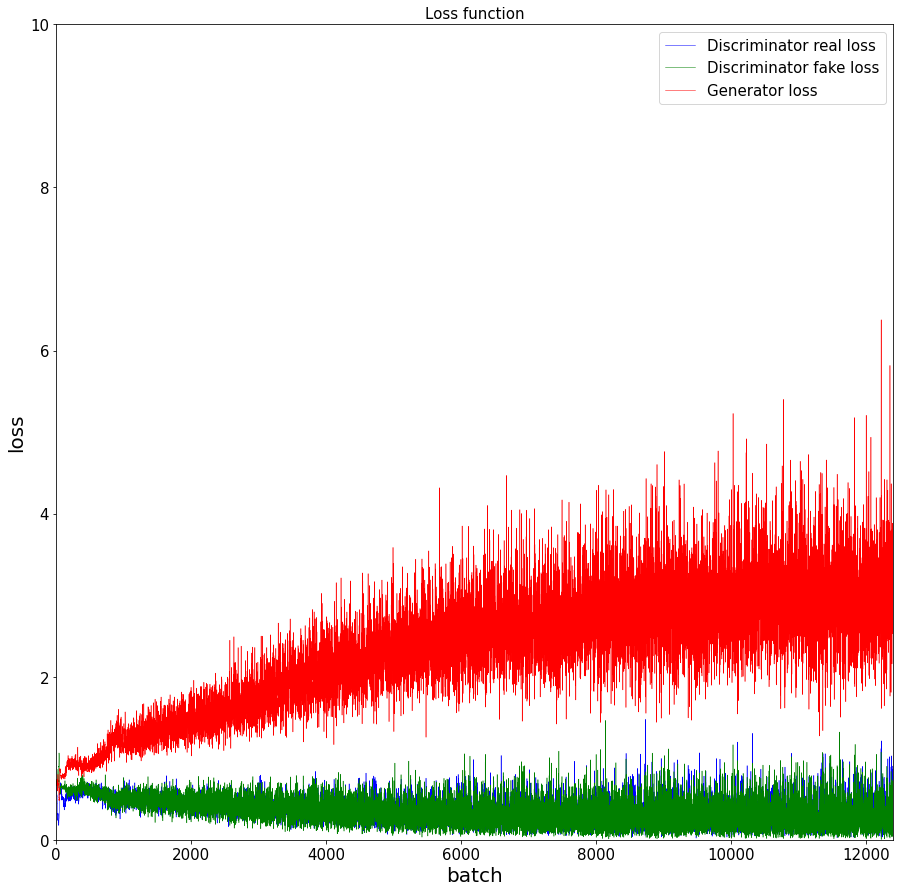

In [14]:
cgan.train(number_of_epochs=100, load_past_model=True)
cgan.plot_loss()

IndexError: index 16 is out of bounds for axis 0 with size 16

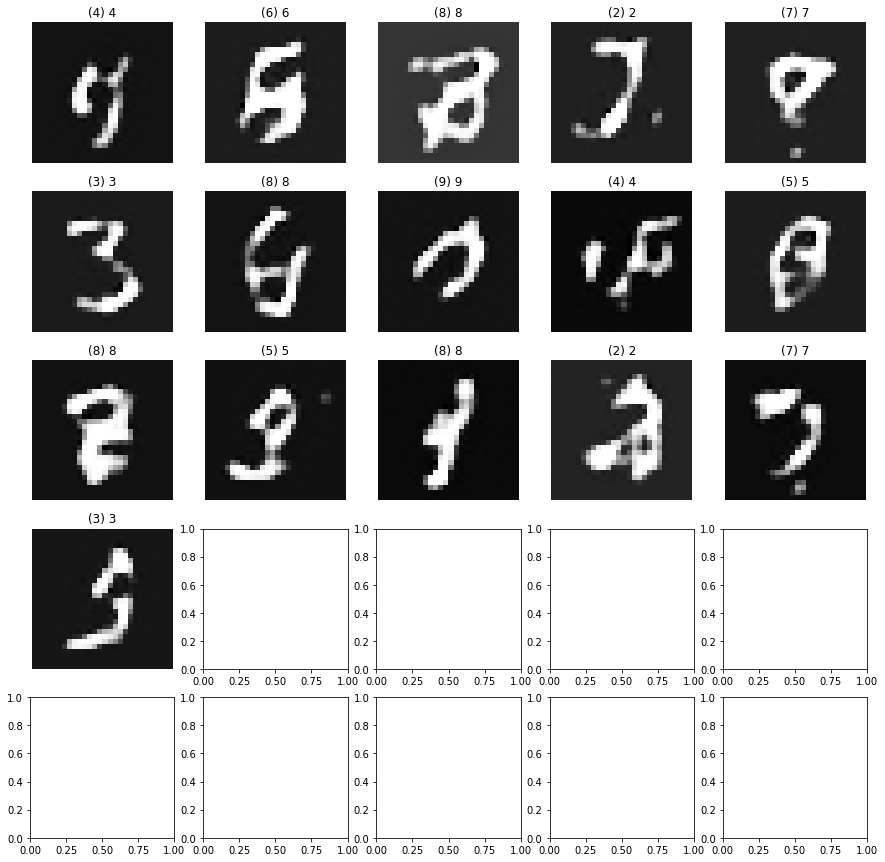

In [12]:
cgan.show_sample_images()

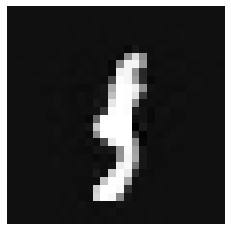

In [13]:
cgan.show_sample_image_one(1)